In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from state_space import simulator,system
from state_space.base import InputWarpper
from state_space.system import Pendulm
from state_space.simulator import DynamicSystem,Variable,WhiteNoise,TimerVariable

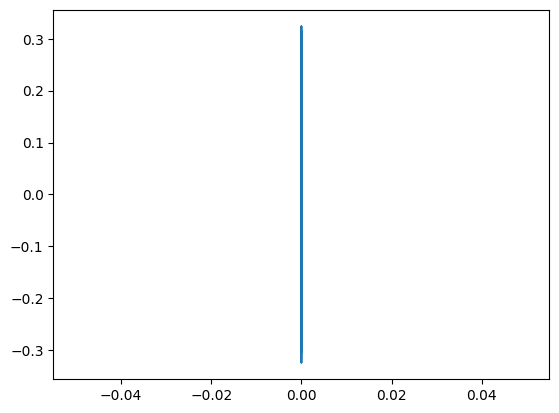

In [2]:
pendulm = Pendulm(1,0.2)
simulator = DynamicSystem(pendulm.A,pendulm.B,pendulm.C,pendulm.D)
simulator.init(np.array([[np.pi/10],[0]]))
theta = []
for step in range(10000):
    t = simulator.update(0)
    theta.append([simulator.t,t.item()])
    
theta = np.array(theta)
plt.plot(theta[:,0],theta[:,1])

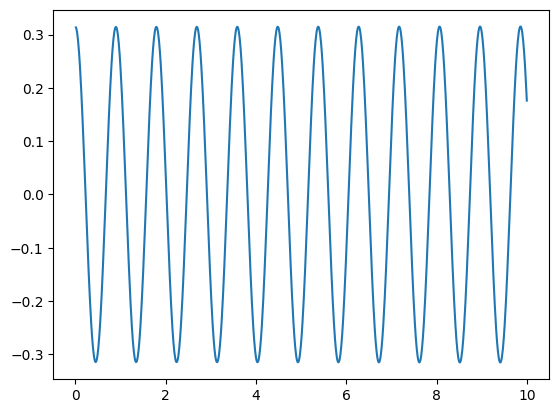

In [3]:
simulator.init(np.array([[np.pi/10],[0]]))
simulator.set_u(0)
simulator.set_t_stop(10)
history = []
for i in simulator:
    history.append([simulator.t,i.item()])
history = np.array(history)
plt.plot(history[:,0],history[:,1])

[[-0.28944569]]


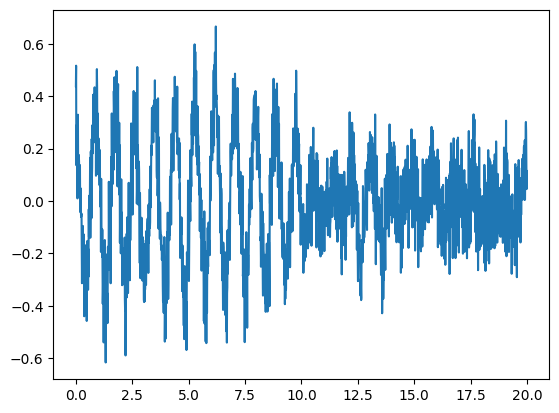

In [4]:
simulator = DynamicSystem(pendulm.A,pendulm.B,pendulm.C,pendulm.D)
simulator.init(np.array([[np.pi/10],[0]]))
simulator.set_u(0)
simulator.set_t_stop(20)
noise = WhiteNoise(0,0.3)
measure_noise = WhiteNoise(0,0.1)
simulator.u = noise
history = []
for i in simulator:
    history.append([simulator.t,i.item()+measure_noise.y.item()])
history = np.array(history)
plt.plot(history[:,0],history[:,1])
print(simulator.u)

In [5]:
simulator._u.y

array([-0.09616307])

In [6]:

from state_space.kalman_filter import KalmanFilter
from state_space.simulator import DiscreteDynamicSystem
simulator = DynamicSystem(pendulm.A,pendulm.B,pendulm.C,pendulm.D)
dis_simulator = DiscreteDynamicSystem.from_continous(simulator,np.array([[np.pi/10],[0]]))
filter = KalmanFilter(dis_simulator._A,dis_simulator._B,dis_simulator._C,dis_simulator._x,np.diag((0,1)))

[[0.0235339]]


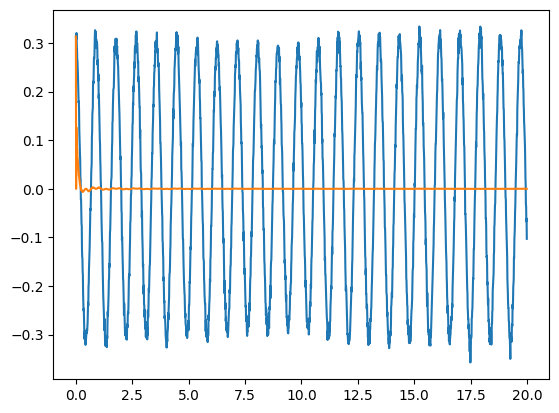

In [7]:
simulator.init(np.array([[np.pi/10],[0]]))
filter.init(simulator.x)
simulator.set_t_stop(20)
noise = WhiteNoise(0,0.03)
measure_noise = WhiteNoise(0,0.01)
simulator.u = noise
history = []
for i in simulator:
    y = i.item()+measure_noise.y.item()
    _,pre = filter.predict(simulator.u)
    filter.update(y)
    history.append([simulator.t,y,pre.item()])
    # history.append([simulator.t,y])
history = np.array(history)
plt.plot(history[:,0],history[:,1])
plt.plot(history[:,0],history[:,2])
print(simulator.u)

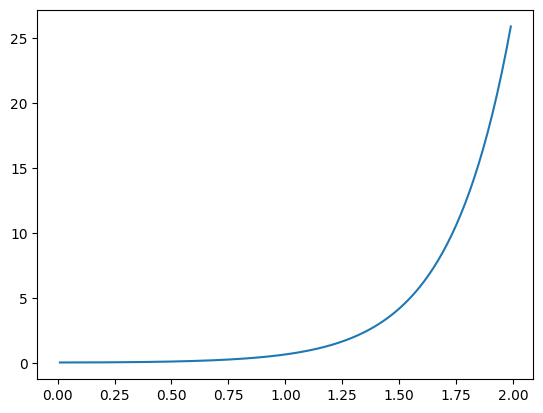

In [8]:
from state_space.system import InvertPendulm
m,M,L = 48,47.7,0.85
simulator = DynamicSystem.from_system(InvertPendulm(m,M,L))
simulator.init(np.array([[0],[0],[np.pi/100],[0]]))
simulator.set_u(0)
simulator.set_t_stop(2)
history = []
for i in simulator:
    history.append([simulator.t,i.item()])
history = np.array(history)
plt.plot(history[:,0],history[:,1])

In [9]:
from state_space.base import Timer
from state_space.transfer_function import Transfer
timer = Timer(10,0.001)
def cos(t):
    return np.cos(2*np.pi*t)
# s = Variable(0,0.001,10,cos)
s = TimerVariable(timer,cos)
a = Transfer([1],[1,2,14],0,timer)
a.u = s

In [10]:
s.update()
s.t,s.y

(0.001, 0.9999802608561371)

In [26]:
a.y

array([[-0.00675032]])

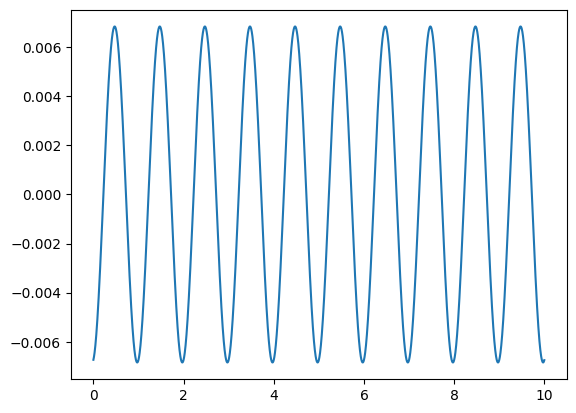

In [21]:
h = []
for y in a:
    h.append([a.t,y.item()])
    timer.update()
h = np.array(h)
plt.plot(h[:,0],h[:,1])

In [13]:
timer.t

10.000999999999896